In [2]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.advanced_activations import LeakyReLU
import tensorflow as tf
from tensorflow import keras
import keras.layers as layers
import pandas as pd,cv2,numpy as np
image_size = 227

https://thecleverprogrammer.com/2021/12/13/alexnet-architecture-using-python/

In [3]:
# Create AlexNet
model = keras.Sequential()
model.add(layers.Conv2D(filters=96, kernel_size=(11, 11), 
                        strides=(4, 4), activation="relu", 
                        input_shape=(image_size, image_size, 1)))   #image_size更改大小跟通套數會影響結果
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(3, 3), strides= (2, 2)))
model.add(layers.Conv2D(filters=256, kernel_size=(5, 5), 
                        strides=(1, 1), activation="relu", 
                        padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)))
model.add(layers.Conv2D(filters=384, kernel_size=(3, 3), 
                        strides=(1, 1), activation="relu", 
                        padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters=384, kernel_size=(3, 3), 
                        strides=(1, 1), activation="relu", 
                        padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), 
                        strides=(1, 1), activation="relu", 
                        padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(4096, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(6, activation="softmax"))
model.compile(loss='sparse_categorical_crossentropy', 
            optimizer=tf.keras.optimizers.SGD(learning_rate=0.001), 
            metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        11712     
                                                                 
 batch_normalization (BatchN  (None, 55, 55, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 27, 27, 256)      1024      
 hNormalization)                                                 
                                                        

In [15]:
# Load Train Data
train_images,train_labels = [],[]
height = pd.read_csv('train.csv')
for index in range(len(height.index)):
#     print(index)     
    img = cv2.resize(cv2.imread('train_images/%s'%(str(height.iloc[index, 0])),0),(image_size,image_size))
    train_images.append(img)
    train_labels.append(height.iloc[index,1])
np.reshape(train_labels,(len(train_images),1))

array([[0],
       [1],
       [1],
       ...,
       [3],
       [0],
       [5]], dtype=int64)

In [16]:
from sklearn.model_selection import train_test_split
train_images = np.array(train_images,dtype=np.float32)
train_labels = np.array(train_labels,dtype=np.float32)
# print(train_images)
# print(train_images/255.0)
print(train_images.shape)
print(train_labels.shape)

(2528, 227, 227)
(2528,)


In [ ]:
# train_image,test_image, train_label , test_label = train_test_split(train_images, train_labels, test_size=0.8, random_state=42)
# train_image,test_image, train_label , test_label

In [17]:
# Training
import tensorflow as tf
with tf.device('/gpu:1'):
    history = model.fit(train_images,train_labels,epochs=70,batch_size=32,validation_split=0.7) # 

Epoch 1/70
24/24 [==============================] - 2s 63ms/step - loss: 1.7385 - accuracy: 0.5488 - val_loss: 5.7068 - val_accuracy: 0.2757
Epoch 2/70
24/24 [==============================] - 1s 47ms/step - loss: 0.7870 - accuracy: 0.7520 - val_loss: 4.7469 - val_accuracy: 0.3085
Epoch 3/70
24/24 [==============================] - 1s 48ms/step - loss: 0.4930 - accuracy: 0.8325 - val_loss: 4.7378 - val_accuracy: 0.2576
Epoch 4/70
24/24 [==============================] - 1s 47ms/step - loss: 0.4157 - accuracy: 0.8615 - val_loss: 3.2394 - val_accuracy: 0.2616
Epoch 5/70
24/24 [==============================] - 1s 48ms/step - loss: 0.2814 - accuracy: 0.9090 - val_loss: 2.1803 - val_accuracy: 0.3277
Epoch 6/70
24/24 [==============================] - 1s 47ms/step - loss: 0.2101 - accuracy: 0.9288 - val_loss: 1.7090 - val_accuracy: 0.5435
Epoch 7/70
24/24 [==============================] - 1s 48ms/step - loss: 0.2240 - accuracy: 0.9222 - val_loss: 1.6469 - val_accuracy: 0.4599
Epoch 8/70
24

Epoch 59/70
24/24 [==============================] - 1s 48ms/step - loss: 0.0059 - accuracy: 0.9987 - val_loss: 0.2281 - val_accuracy: 0.9260
Epoch 60/70
24/24 [==============================] - 1s 48ms/step - loss: 0.0169 - accuracy: 0.9947 - val_loss: 0.6319 - val_accuracy: 0.7751
Epoch 61/70
24/24 [==============================] - 1s 48ms/step - loss: 0.0068 - accuracy: 1.0000 - val_loss: 0.1301 - val_accuracy: 0.9661
Epoch 62/70
24/24 [==============================] - 1s 48ms/step - loss: 0.0230 - accuracy: 0.9934 - val_loss: 1.0700 - val_accuracy: 0.7395
Epoch 63/70
24/24 [==============================] - 1s 48ms/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 0.1450 - val_accuracy: 0.9554
Epoch 64/70
24/24 [==============================] - 1s 49ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.0982 - val_accuracy: 0.9667
Epoch 65/70
24/24 [==============================] - 1s 49ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.1164 - val_accuracy: 0.9616
Epoch 

In [18]:
import random,numpy as np
x = random.randint(0, len(train_images))
result = model.predict(train_images[x].reshape(-1,image_size,image_size,1))
print(result)
print(x,np.argmax(result))

[[9.2794330e-08 1.7052659e-04 1.9534988e-07 9.9982101e-01 2.9860014e-06
  5.1555353e-06]]
1419 3


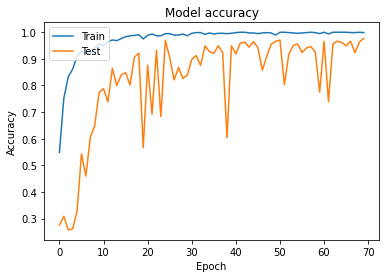

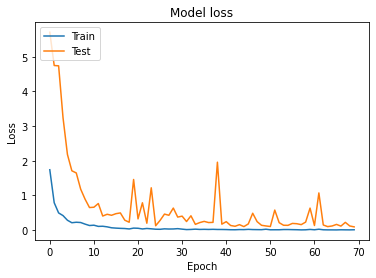

In [19]:
import matplotlib.pyplot as plt
# 绘制训练 & 验证的准确率值
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# 绘制训练 & 验证的损失值
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [20]:
with tf.device('/gpu:0'):
    train_loss, train_acc = model.evaluate(train_images,  train_labels)
print('test_loss:', train_loss)
print('test_acc:', train_acc)

79/79 [==============================] - 1s 10ms/step - loss: 0.0644 - accuracy: 0.9838
test_loss: 0.06442102044820786
test_acc: 0.983781635761261


In [21]:
model.save('Final_AOI_Alexnet_%d.h5'%(image_size))

In [24]:
from keras.models import load_model
import csv,pandas as pd,cv2,numpy as np
model = load_model('Final_AOI_Alexnet_%d.h5'%(image_size)) #載入訓練好的模型
# Load Test Data
test_images = []
height = pd.read_csv('test.csv')
with tf.device('/gpu:1'):
    for index in range(len(height.index)):    
        img = cv2.resize(cv2.imread('test_images/%s'%(str(height.iloc[index, 0])),-1),(image_size,image_size))
        result = model.predict(img.reshape(-1,image_size,image_size,1))
        if index % 1000 == 0:
            print(index,np.argmax(result))
        with open('Final_alexnet_%d.csv'%(image_size), 'a+', newline='') as csvfile:
                writer = csv.writer(csvfile)
                writer.writerow([str(height.iloc[index, 0]), np.argmax(result)])

0 1
1000 0
2000 0
3000 1
4000 3
5000 1
6000 0
7000 5
8000 5
9000 0
10000 5
